C:\Anaconda\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


interation= 0
interation= 1
interation= 2
interation= 3
interation= 4
interation= 5
interation= 6
interation= 7
interation= 8
interation= 9
interation= 10
interation= 11
interation= 12
interation= 13
interation= 14
interation= 15
interation= 16
interation= 17


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


<function matplotlib.pyplot.show>

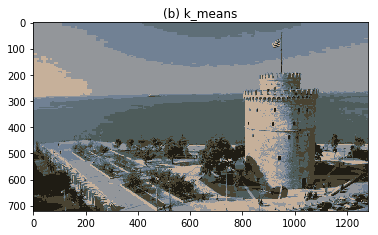

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
from scipy.misc import *
from scipy import signal 


def createDataset(im):
    img=im.reshape((im.shape[0]*im.shape[1], im.shape[2]))
    return img


def kMeansCluster(features, centers):
    number=0
    while number<18:
        print('interation=',number)
        idx=[]
        for i in range (features.shape[0]):
            intens_features=features[i][0]**2+features[i][1]**2+features[i][2]**2
            dis_=[]
            for j in range (centers.shape[0]):
                intens_centers=centers[j][0]**2+centers[j][1]**2+centers[j][2]**2
                distance=(intens_features-intens_centers)**2
                dis_.append(distance)
            category=dis_.index(min(dis_))
            idx.append(category)
        center=np.zeros(centers.shape)
        count=np.zeros(centers.shape)
        for i in range (len(idx)):
            center[idx[i]]=center[idx[i]]+features[i]
            count[idx[i]]=count[idx[i]]+np.array([1,1,1])
        centers=center/count
        number=number+1
    return [idx, centers]   
        
def mapValues(img,centers,index,features):
    temp=np.zeros(features.shape)
    for i in range (features.shape[0]):
        temp[i]=centers[index[i]]
    img_seg=temp.reshape((img.shape[0],img.shape[1],3))
    return img_seg
        

pic=imread('white-tower.png')
plt.imshow(pic)
plt.title('(a) original')
plt.show

np.random.seed(5)
nclusters = 7
features = createDataset(pic)
id = np.random.randint(np.shape(features)[0], size=(1, nclusters))
centers=features[id].reshape((nclusters,3))

result=kMeansCluster(features, centers)
centers_=result[1]
index=result[0]
im_seg=mapValues(pic,centers_,index,features)
img_seg=im_seg.astype(np.uint8)
plt.imshow(img_seg)
imsave('k_means.png',img_seg)
plt.title('(b) k_means')
plt.show